# Prediction using Supervised ML

## Predict the score of a student based on number of study hours

### Name: Ashwaq Khazi

In [2]:
#importing all necessary librabries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Reading data from remote url
dt = pd.read_csv('http://bit.ly/w-data')
print(dt)
dt.to_csv('smalld')

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [4]:
dt.shape

(25, 2)

In [5]:
dt.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Visualizing the data

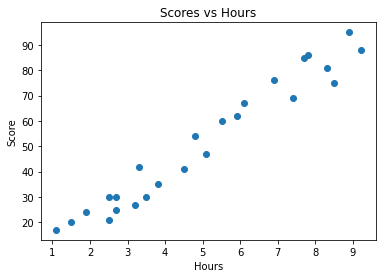

In [6]:
#Plotting Hours vs Score
plt.scatter(dt['Hours'],dt['Scores'])
plt.title('Scores vs Hours')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

In [7]:
#assigning x and y values from the data
x = dt.iloc[:,:-1].values
y = dt.iloc[:,-1].values

In [8]:
#Importing Scikit Learn libs and dividing test and train sets 30% and 70% of data respectively.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [9]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

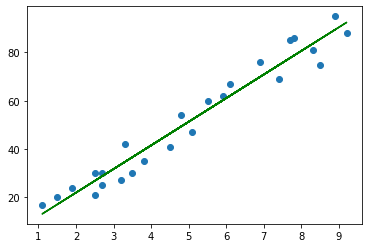

In [10]:
#plotting the regression line
line = x*reg.coef_+ reg.intercept_
plt.scatter(x,y)
plt.plot(x, line, color = 'green')
plt.show()

In [11]:
#Predicting Test set results
y_pred = reg.predict(x_test)
print(y_pred)

[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


In [12]:
#Comparing Actual and Predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [15]:
ds = np.array(9.25)
ds = ds.reshape(-1, 1)
print('The student will score {} if He/She studies for 9.25 Hours/Day'.format(reg.predict(ds)[0]))

The student will score 92.91505723477056 if He/She studies for 9.25 Hours/Day


In [18]:
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.419727808027652


In [16]:
from sklearn.metrics import r2_score
print("R-Square for the model:",r2_score(y_test, y_pred))
print("Accuracy: {}%".format(round((r2_score(y_test, y_pred)*100),2)))

R-Square for the model: 0.9568211104435257
Accuracy: 95.68%


### We used Linear Regression model using Scikit Learn and predicted how much he/she will score if that student studies for 9.25Hours/Day And that came out to be 92.92 with 95.68% accuracy